In [1]:
from pycalphad import Database, equilibrium
from pycalphad import variables as v
import pandas as pd
import numpy as np

db = Database('steel_database_fix.tdb')

#this part of script just convert the alloy composition from weight fraction to molar fraction
weight_elem = [12.011,28.085,54.938,51.996,58.693,95.95,183.84,63.546,14.007,30.974,32.06,55.845]
frac_mass = [0.02,  0.3,   1.8,   22.5,  5.4,   2.8,  0,     0,     0.16,  0.03,  0.001,66.989]
frac = [frac_mass[i] / weight_elem[i] for i in range(0,len(weight_elem))]
frac_mol = [frac[i]/sum(frac) for i in range(0,len(weight_elem))]


comps = ['FE','CR','NI','MO','MN','N','C','VA']
phases = ['BCC_A2','FCC_A1','SIGMA']
param = {v.X('CR'):frac_mol[3],v.X('NI'):frac_mol[4],
         v.X('MO'):frac_mol[5],v.X('MN'):frac_mol[2],v.X('N'):frac_mol[8],
         v.X('C'):frac_mol[0],
         v.T:(1073,1673,10),v.P:101325}
eq = equilibrium(db, comps, phases, param)

df = eq.to_dataframe()

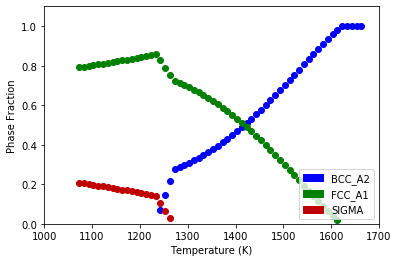

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad.plot.utils import phase_legend
phase_handles, phasemap = phase_legend(phases)

plt.gca().set_xlabel('Temperature (K)')
plt.gca().set_ylabel('Phase Fraction')
plt.gca().set_ylim((0,1.1))
plt.gca().set_xlim((1000, 1700))

for name in phases:
    phase_indices = np.nonzero(eq.Phase.values == name)
    plt.scatter(np.take(eq['T'].values, phase_indices[2]), eq.NP.values[phase_indices], color=phasemap[name])
plt.gca().legend(phase_handles, phases, loc='lower right')